## Midterm Project



**Scraping websites + cleaning**

In [41]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re

Nili Lotan Data

In [42]:
# Nili Lotan Product Scraper
def nili_product_webscraper(url):
  # Request and turn catalog to soup
  r = requests.get(url)
  retailer_soup = BeautifulSoup(r.text, 'html.parser')

  # Find product listings
  product = retailer_soup.find_all('div', {'class': 'product-item'})
  product_data = []

  # Loop through listings and add needed product details to list
  for listing in product:
    vendor = 'Nili Lotan'
    name = listing.find('p', {'class': 'product-item__title'})
    category  = name.text.split()[-1]
    price = listing.find('span', {'class': 'new-price'})
    product_link = listing.find('a', {'class': 'product-link product-item__info'}).get('href')

    # Request and turn product page to soup
    product_link = 'https://nililotan.com'+ product_link
    p = requests.get(product_link)
    product_page_soup = BeautifulSoup(p.text, 'html.parser')

    # Extract necessary product details
    product_desc = product_page_soup.find('div', {'class': 'product__description-text'})
    if product_desc:
      product_desc = product_desc.text.split()

    size_guide = bool(product_page_soup.find('a', {'class': 'nili-openButton size-guide-btn'}))

    # create a set of product vocabulary
    set_desc = set(product_desc)

    # return the quotient of appropriate lengths
    len_desc = len(product_desc)
    lex_diversity = (len(set_desc)/len_desc)*100

    product_desc = ' '.join(product_desc)
    product_details  = product_page_soup.find('ul', {'class': 'product__description-below'}).text

    # number of product pictures
    #pictures = product_page_soup.find_all('div', class_ = 'product__thumbnail-image')
    pictures = product_page_soup.select('div.product__thumbnail-image img')
    pic_count = len(pictures)

    # Check for null prices before turning to float
    if price:
      price = price.text.split()
      price = ''.join(price)
      price = price.replace("$", "").replace(",", "")
      price = float(price)

      if price < 500:
        price_tag = 'Affordable fashion'

      elif price < 2000:
        price_tag = 'Accessible Luxury'

      elif price < 10000:
        price_tag = 'High Luxury'

      else:
        price_tag = 'Ultra Luxury'

    product_data.append({
        'Retailer': 'Nili Lotan',
        'Vendor': vendor,
        'Category': category,
        'Name': name,
        'Price': price,
        'Product Link': product_link,
        'Description': product_desc,
        'Product Details': product_details,
        'Description Lexical Diversity':lex_diversity,
        'Description Length': len_desc,
        'Size Guide': size_guide,
        'Luxury Tier': price_tag,
        'Number of pictures' : pic_count
    })

  # Create DataFrame
  product_df = pd.DataFrame(product_data)
  return product_df

nili_df = nili_product_webscraper('https://www.nililotan.com/collections/all-womens')
nili_df

,Retailer,Vendor,Category,Name,Price,Product Link,Description,Product Details,Description Lexical Diversity,Description Length,Size Guide,Luxury Tier,Number of pictures
0,Nili Lotan,Nili Lotan,JACKET,[ELAN SHEARLING JACKET],2990.0,https://nililotan.com/collections/all-womens/p...,Short-body shearling jacket. Collarless design...,100% Lambskin LeatherProfessional leather care...,94.736842,19,True,High Luxury,17
1,Nili Lotan,Nili Lotan,JEAN,[SHON JEAN],410.0,https://nililotan.com/collections/all-womens/p...,"Mid-rise, relaxed fit barrel leg jean. Uniquel...",Made in USA100% CottonMachine wash coldTumble ...,93.750000,32,True,Affordable fashion,7
2,Nili Lotan,Nili Lotan,TOP,[ALLA SILK HALTERNECK TOP],420.0,https://nililotan.com/collections/all-womens/p...,Halterneck top. Tie neck. Back keyhole. Low ar...,"Made in USA97% Silk, 3% Metallised PolyesterDr...",100.000000,13,True,Affordable fashion,9
3,Nili Lotan,Nili Lotan,PANT,[SHON WOOL PANT],590.0,https://nililotan.com/collections/all-womens/p...,"Mid-rise, relaxed fit barrel leg pant. Uniquel...",Made in USA100% Virgin WoolDry clean onlyGentl...,89.189189,37,True,Accessible Luxury,7
4,Nili Lotan,Nili Lotan,COAT,[JOSIE SHEARLING COAT],3990.0,https://nililotan.com/collections/all-womens/p...,Oversized shearling coat in Spanish skin with ...,"100% Lambskin Leather, Ovies AriesSpot clean o...",95.454545,22,True,High Luxury,10
5,Nili Lotan,Nili Lotan,BAG,[LOU BAG],2500.0,https://nililotan.com/collections/all-womens/p...,Top-handle bag in luxurious Italian smooth lea...,Smooth LeatherProfessional leather care only,86.597938,97,False,High Luxury,11
6,Nili Lotan,Nili Lotan,JACKET,[ELAN SHEARLING JACKET],2990.0,https://nililotan.com/collections/all-womens/p...,Short-body shearling jacket. Collarless design...,100% Lambksin LeatherProfessional leather care...,94.736842,19,True,High Luxury,12
7,Nili Lotan,Nili Lotan,JEAN,[MITCHELL JEAN],410.0,https://nililotan.com/collections/all-womens/p...,Mid-rise relaxed leg jean in non-stretch Japan...,Made in USA100% CottonMachine wash coldLow iro...,91.489362,47,True,Affordable fashion,6
8,Nili Lotan,Nili Lotan,BELT,[LOUISE BELT],310.0,https://nililotan.com/collections/all-womens/p...,Designed with the modern women in mind. Pair w...,100% Calfskin LeatherProfessional leather care...,87.234043,47,True,Affordable fashion,3
9,Nili Lotan,Nili Lotan,PANT,[SHON CAMOUFLAGE PANT],470.0,https://nililotan.com/collections/all-womens/p...,"Mid-rise, relaxed fit barrel leg pant. Uniquel...","Made in USA98% Cotton, 2% PolyurethaneGentle w...",89.189189,37,True,Affordable fashion,9


IF SOHO Data

In [43]:
# Request and turn catalog to soup
url = 'https://ifsohonewyork.com/collections/all'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

products_list = []

# Find all product listings
products = soup.find_all('div', class_='product-index')
categories = ['Boots', 'Jacket', 'Robe', 'Shirt', 'Dress', 'Pant', 'Hood', 'Bomber',
              'Coat', 'Blazer', 'Waistcoat', 'Trousers', 'Trouser', 'Blouse', 'Jumper',
              'Derby', 'Jupe', 'Veste', 'Pull', 'Sweater','Cape', 'Cardigan', 'Top', 'Vest']

for product in products:
    name = product.find('h3')
    price = product.find('div', class_='prod-price')
    vendor = product.find('p', class_='vendor-name')

    # Retrieve category
    for word in name.text.split():
      if word in categories:
        category = word.upper()

    a_tag = product.find("a", href=True)
    base_url = 'https://ifsohonewyork.com'

    # Request and turn product page to soup
    product_url = base_url + a_tag['href']
    a_response = requests.get(product_url)
    a_soup = BeautifulSoup(a_response.text, 'html.parser')
    description = a_soup.find('div', class_='description').text.split()
    size_guide = bool(a_soup.find('span', {'class': 'view-size'}))

    # create a set of product vocabulary
    set_desc = set(description)

    # return the quotient of appropriate lengths
    len_desc = len(description)
    lex_diversity = (len(set_desc)/len_desc)*100

    # number of product pictures
    pictures = a_soup.find_all('div', class_ = 'mthumb')
    pic_count = len(pictures)

    # categorize price
    '''
    ultra-luxury -> $10000+
    high luxury -> $2000 - $10000
    accessible luxury -> $500 - $2000
    affordable fashion -> below $500
    '''
    if price:
      price = price.text.split()
      price = ''.join(price)
      price = price.replace("$", "").replace(",", "")
      price = float(price)

    if not price:
        continue

    if price < 500:
      price_tag = 'Affordable fashion'

    elif price < 2000:
      price_tag = 'Accessible Luxury'

    elif price < 10000:
      price_tag = 'High Luxury'

    else:
      price_tag = 'Ultra Luxury'

    description = ' '.join(description)
    products_list.append({
        'Retailer': 'IF SOHO',
        'Vendor' : vendor,
        'Category': category,
        'Name' : name,
        'Price' : price,
        'Product Link': product_url,
        'Description' : description,
        'Product Details' : description,
        'Description Lexical Diversity': lex_diversity,
        'Description Length': len_desc,
        'Size Guide': size_guide,
        'Luxury Tier': price_tag,
        'Number of pictures':pic_count})

ifsoho_df = pd.DataFrame(products_list)
ifsoho_df

,Retailer,Vendor,Category,Name,Price,Product Link,Description,Product Details,Description Lexical Diversity,Description Length,Size Guide,Luxury Tier,Number of pictures
0,IF SOHO,[A Tentative Atelier],SWEATER,[A Tentative Atelier Mens Bertram Brooker Swea...,1375.0,https://ifsohonewyork.com/collections/all/prod...,Virgin wool cable knit sweater in gray blue fe...,Virgin wool cable knit sweater in gray blue fe...,86.538462,52,False,Accessible Luxury,3
1,IF SOHO,[A Tentative Atelier],BLAZER,[A Tentative Atelier Mens Black & Beige Jenkin...,1900.0,https://ifsohonewyork.com/collections/all/prod...,Virgin wool linen blazer in black and beige wo...,Virgin wool linen blazer in black and beige wo...,81.730769,104,True,Accessible Luxury,3
2,IF SOHO,[A Tentative Atelier],BLAZER,[A Tentative Atelier Mens Ginsberg Pants],1270.0,https://ifsohonewyork.com/collections/all/prod...,Virgin wool linen tapered leg pants in black a...,Virgin wool linen tapered leg pants in black a...,78.409091,88,True,Accessible Luxury,3
3,IF SOHO,[A Tentative Atelier],BLAZER,[A Tentative Atelier Mens Malcolm Blazer],1305.0,https://ifsohonewyork.com/collections/all/prod...,Deadstock wool blazer in brown featuring light...,Deadstock wool blazer in brown featuring light...,77.669903,103,True,Accessible Luxury,3
4,IF SOHO,[A Tentative Atelier],JACKET,[A Tentative Atelier Mens Marcell Poot Jacket],1325.0,https://ifsohonewyork.com/collections/all/prod...,Wool cotton blend fleece jacket in dark gray. ...,Wool cotton blend fleece jacket in dark gray. ...,91.428571,70,True,Accessible Luxury,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,IF SOHO,[Julie Kegels],TOP,[Julie Kegels Womens Aubergine Tilda Top],875.0,https://ifsohonewyork.com/collections/all/prod...,Viscose silk blend velvet cropped top in auber...,Viscose silk blend velvet cropped top in auber...,83.333333,42,True,Accessible Luxury,3
176,IF SOHO,[Julie Kegels],BLAZER,[Julie Kegels Womens Bream Blazer],2060.0,https://ifsohonewyork.com/collections/all/prod...,Wool gabardine blazer in navy featuring remova...,Wool gabardine blazer in navy featuring remova...,80.952381,63,True,High Luxury,4
177,IF SOHO,[Julie Kegels],DRESS,[Julie Kegels Womens Daniele Dress],1375.0,https://ifsohonewyork.com/collections/all/prod...,Pink and red asymmetric dress featuring polyes...,Pink and red asymmetric dress featuring polyes...,84.126984,63,True,Accessible Luxury,3
178,IF SOHO,[Julie Kegels],DRESS,[Julie Kegels Womens Duany Dress],1565.0,https://ifsohonewyork.com/collections/all/prod...,Wool gabardine sleeveless dress in black featu...,Wool gabardine sleeveless dress in black featu...,90.277778,72,True,Accessible Luxury,4


La Garconne Data

In [44]:
lagarconne_product_list = []

# run through the first 2 pages of the website
for lagarconne_page in range(1, 2):
    lagarconne_url = f'https://lagarconne.com/collections/all?page={lagarconne_page}'
    lagarconne_response = requests.get(lagarconne_url)
    lagarconne_soup = BeautifulSoup(lagarconne_response.text, 'html.parser')

    lagarconne_products = lagarconne_soup.find_all('div', class_="lg-col-6 lg-col-md-3 lg-product-list-item")

    for product in lagarconne_products:
        name = product.find('h3', class_="lg-product-list-item-title")
        price = product.find('span', class_="money")
        vendor = product.find('p', class_="lg-product-list-item-vendor")

        name_text = name.get_text(strip=True) if name else None
        price_text = price.get_text(strip=True) if price else None
        price_value = float(price_text.replace('$', '').replace(',', '')) if price_text else None

        if price_value:
          if price_value < 500:
            price_tag = 'Affordable fashion'

          elif price_value < 2000:
            price_tag = 'Accessible Luxury'

          elif price_value < 10000:
            price_tag = 'High Luxury'

          else:
            price_tag = 'Ultra Luxury'

        vendor_text = vendor.get_text(strip=True) if vendor else None

        # Extract product link
        link_tag = product.find('a', href=True)
        if not link_tag:
            continue
        product_link = 'https://lagarconne.com' + link_tag['href']
        p = requests.get(product_link)
        product_page_soup = BeautifulSoup(p.text, 'html.parser')

        # description
        desc_div = product_page_soup.find('div', class_="lg-desc-product lg-col-md-8 lg-no-gutters")
        descrip = desc_div.find('p')
        product_desc = descrip.get_text(" ", strip=True).split()

        # Lexical diversity
        set_desc = set(product_desc)
        len_desc = len(product_desc)
        lex_diversity = round(len(set_desc)/len_desc*100, 2)
        product_desc_str = ' '.join(product_desc)

        # Product details (paragraph with non-breaking space)
        details = desc_div.find('p', string=lambda t: t and "Color:" in t)
        product_details = details.get_text(" ", strip=True) if details else None

        # Size guide presence
        size_guide = bool(product_page_soup.find('a', {'class': 'lg-link product-sizechart'}))

        if not price_text:
            continue
        # number of product pictures
        pictures = product_page_soup.find_all('div', class_='lg-product-item')
        pic_count = len(pictures)
        #print(pic_count)

        # category extraction
        category = (name_text.split('—')[0].split()[-1].upper()
                    if name_text and '—' in name_text
                    else (name_text.split()[-1] if name_text else None))

        if category in ['Perfume', 'Bar', 'Gel', 'Lotion', 'Wash']:
          category = 'Home supplies'
        elif category == 'Rejuven8':
          category = 'Sneaker'

        # append list
        lagarconne_product_list.append({
            'Retailer': 'La Garconne',
            'Vendor': vendor_text,
            'Name': name_text,
            'Price': price_value,
            'Category': category,
            'Product Link': product_link,
            'Description': product_desc_str,
            'Product Details': product_details,
            'Description Lexical Diversity': lex_diversity,
            'Description Length': len_desc,
            'Size Guide': size_guide,
            'Luxury Tier': price_tag,
            'Number of pictures' : pic_count
        })

# DataFrame
lagar_df = pd.DataFrame(lagarconne_product_list)
lagar_df


,Retailer,Vendor,Name,Price,Category,Product Link,Description,Product Details,Description Lexical Diversity,Description Length,Size Guide,Luxury Tier,Number of pictures
0,La Garconne,A.Presse Men,Vintage Hunting Cotton Jacket,840.0,Jacket,https://lagarconne.com/collections/all/product...,A.PRESSE black jacket with a spread collar and...,Color: Black. 100% Cotton. Made in Japan.,86.67,30,False,Accessible Luxury,2
1,La Garconne,A.Presse Men,Vintage Cotton Sweatshirt,490.0,Sweatshirt,https://lagarconne.com/collections/all/product...,A.PRESSE black sweatshirt with a crew neckline...,Color: Black. 100% Cotton. Made in Japan.,88.89,27,False,Affordable fashion,2
2,La Garconne,A.Presse Men,Vintage Half Zip Rib Collar Sweatshirt,565.0,Sweatshirt,https://lagarconne.com/collections/all/product...,A.PRESSE gray sweatshirt with a bomber style c...,Color: Gray. 100% Cotton. Made in Japan.,93.75,32,False,Accessible Luxury,2
3,La Garconne,A.Presse Men,Nep Type A-1 Cotton Silk Jacket,1995.0,Jacket,https://lagarconne.com/collections/all/product...,A.PRESSE black jacket with a spread collar and...,"Color: Black. 85% Cotton, 15% Silk. Lining: 10...",76.92,52,False,Accessible Luxury,2
4,La Garconne,A.Presse Men,Vintage Half Zip Cotton Sweatshirt,620.0,Sweatshirt,https://lagarconne.com/collections/all/product...,A.PRESSE burgundy sweatshirt with textured sid...,Color: Red. 100% Cotton. Made in Japan.,90.00,40,False,Accessible Luxury,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,La Garconne,Kassl,x Tretorn Marie Boot — Black,368.0,BOOT,https://lagarconne.com/collections/all/product...,Kassl in collaboration with Tretorn black slip...,None,86.27,51,True,Affordable fashion,3
76,La Garconne,Kassl,x Tretorn Vera Loafer — Coffee Brown,265.0,LOAFER,https://lagarconne.com/collections/all/product...,Kassl in collaboration with Tretorn coffee bro...,Color: Coffee Brown. 100% Natural Rubber. Impo...,89.13,46,True,Affordable fashion,3
77,La Garconne,Kassl,x Tretorn Vera Loafer — Black,265.0,LOAFER,https://lagarconne.com/collections/all/product...,Kassl in collaboration with Tretorn black slip...,Color: Black. 100% Natural Rubber. Imported.,86.67,45,True,Affordable fashion,4
78,La Garconne,Kassl,x Tretorn Tijntje High Boot,380.0,Boot,https://lagarconne.com/collections/all/product...,Kassl in collaboration with Tretorn coffee bro...,Color: Shiny Coffee Brown. 100% Natural Rubber...,82.00,50,True,Affordable fashion,4


## Data Visualizations

Combining DataFrames

In [45]:
# Combine dataframes
combined_df = pd.concat([lagar_df, ifsoho_df, nili_df], ignore_index=True)

# check all products carried through
print(len(lagar_df) + len(ifsoho_df) + len(nili_df))
print(len(combined_df))

308
308


### Big Question 1: What types of products do competitors offer?

What is the distribution of product types across local competitors?

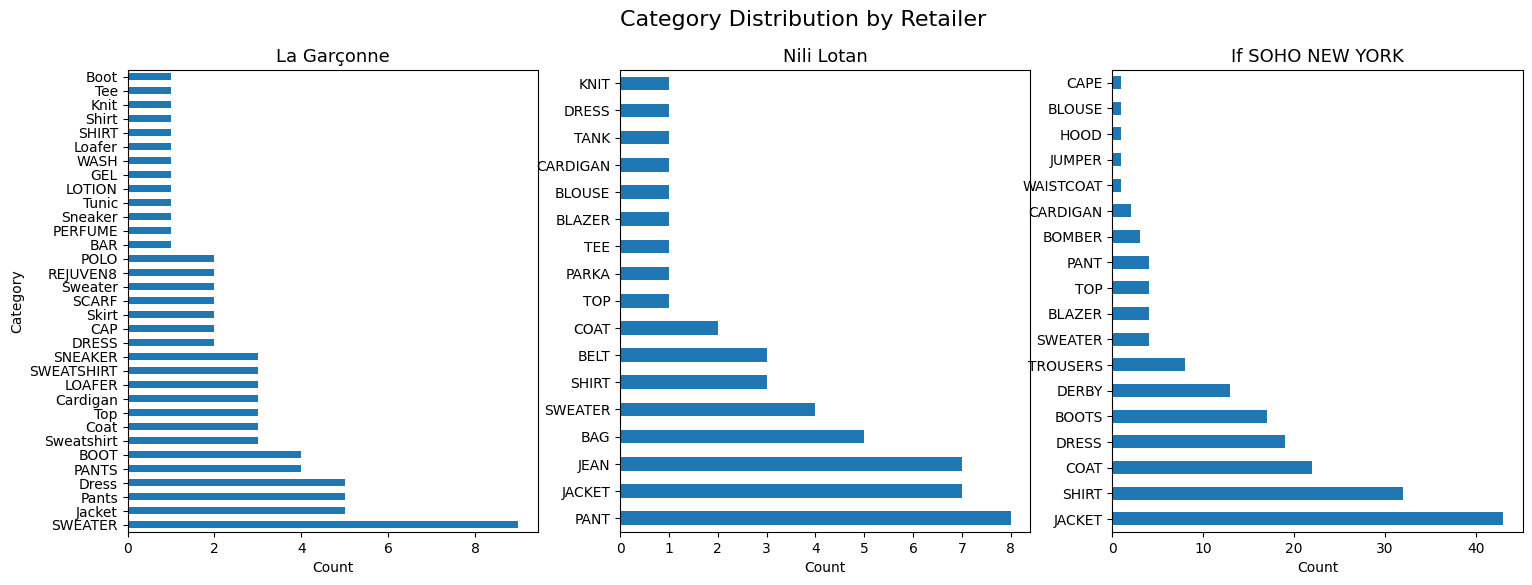

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# La Garconne
lagar_df['Category'].value_counts().plot(
    kind='barh',
    ax=axes[0]
)
axes[0].set_title('La Garçonne', fontsize=13)
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Category')

# Nili Lotan
nili_df['Category'].value_counts().plot(
    kind='barh',
    ax=axes[1]
)
axes[1].set_title('Nili Lotan', fontsize=13)
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

#IF SOHO
ifsoho_df['Category'].value_counts().plot(
    kind='barh',
    ax=axes[2]
)
axes[2].set_title('If SOHO NEW YORK', fontsize=13)
axes[2].set_xlabel('Count')
axes[2].set_ylabel('')

plt.suptitle('Category Distribution by Retailer', fontsize=16)
plt.show()

 What tier of luxury do they fall into?

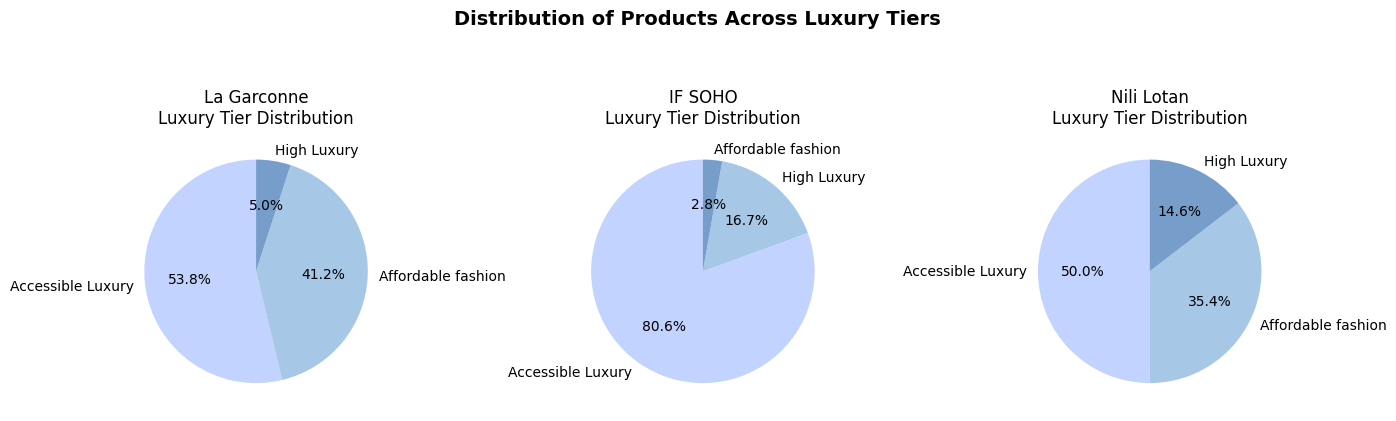

In [47]:
retailers = combined_df['Retailer'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(1, len(retailers), figsize=(14, 5))

for i, retailer in enumerate(retailers):
    # Subset data for this retailer
    subset = combined_df[combined_df['Retailer'] == retailer]
    tier_counts = subset['Luxury Tier'].value_counts()

    # Plot pie chart
    axes[i].pie(
        tier_counts,
        labels=tier_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#c1d3fe', '#a7c7e7', '#779ecb']
    )
    axes[i].set_title(f'{retailer}\nLuxury Tier Distribution')

# Labels and Formatting
plt.suptitle('Distribution of Products Across Luxury Tiers', fontsize=14, fontweight='bold')
plt.tight_layout()

### Big Question 2: How are competitors pricing their products?

Text(0, 0.5, 'Price ($)')

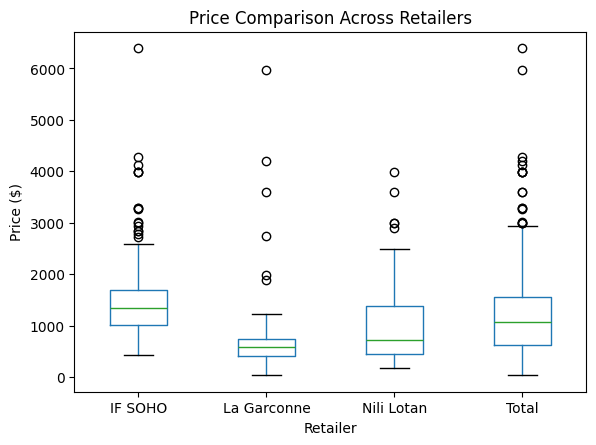

In [48]:
# Creating df that takes into account combined retailer products
plot_df = combined_df.copy()
total_df = plot_df.copy()
total_df['Retailer'] = 'Total'

combined_plot_df = pd.concat([plot_df, total_df])

# Creating boxplot
combined_plot_df.boxplot(column='Price', by='Retailer', grid=False)
plt.title('Price Comparison Across Retailers')
plt.suptitle('')  # removes default pandas title
plt.ylabel('Price ($)')

### Big Question 3: What product information do our competitors give customers?




 Is there a relationship between product price and description length?

Text(15.875000000000009, 0.5, 'Price ($)')

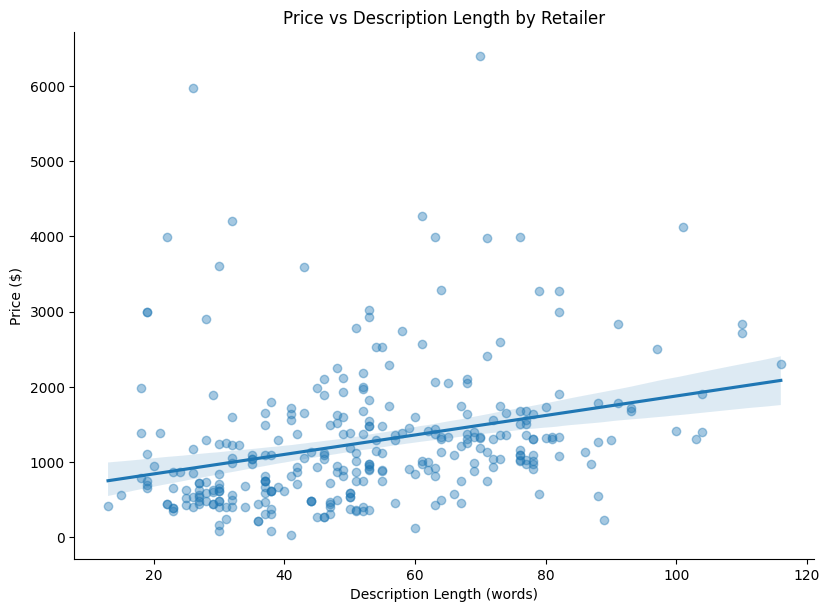

In [50]:
sns.lmplot(
    data=combined_df,
    x='Description Length',
    y='Price',
    height=6,
    aspect=1.4,
    scatter_kws={'alpha':0.4}
)

# Labels
plt.title('Price vs Description Length by Retailer')
plt.xlabel('Description Length (words)')
plt.ylabel('Price ($)')



```
# Finding correlation
```



In [51]:
correlation = combined_df['Price'].corr(combined_df['Description Length'])
print(f"The correlation between Price and Description Length is: {correlation:.2f}")

The correlation between Price and Description Length is: 0.30


How often do retailers provide size guides?

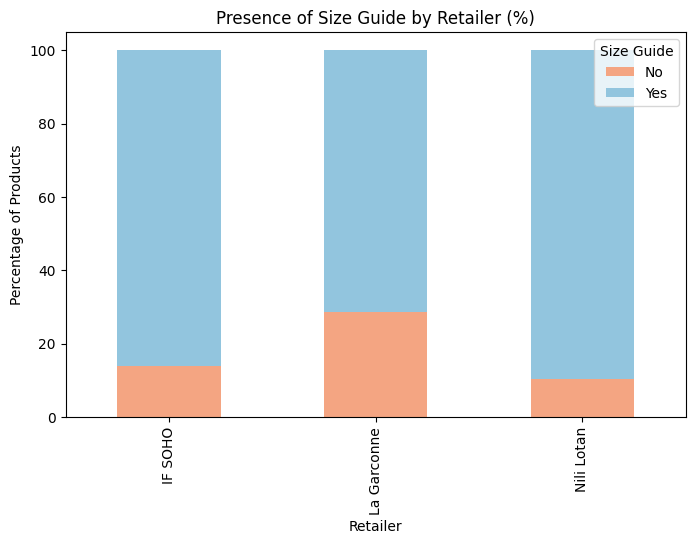

In [49]:
size_guide_counts = combined_df.groupby(['Retailer', 'Size Guide']).size().unstack(fill_value=0)
size_guide_percentages = size_guide_counts.div(size_guide_counts.sum(axis=1), axis=0) * 100

size_guide_percentages.plot(kind='bar', stacked=True, color=['#f4a582', '#92c5de'], figsize=(8,5))

# Labels
plt.title('Presence of Size Guide by Retailer (%)')
plt.ylabel('Percentage of Products')
plt.xlabel('Retailer')
plt.legend(title='Size Guide', labels=['No', 'Yes'])